## Importing Library

In [1]:
import warnings

import re
import string
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as nlp
import nltk
import bs4
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from pandas import Series, DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from math import *

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffl

warnings.filterwarnings('ignore')

In [2]:
reviews = pd.read_csv('IMDB-Dataset.csv')

In [3]:
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
reviews['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

## Check for nulls

In [5]:
reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
reviews['review'] = reviews['review'].astype('str')

In [7]:
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [9]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cleaning

In [10]:
reviews['review'] = reviews['review'].apply(lambda line: bs4.BeautifulSoup(line, 'lxml').text)
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [11]:
reviews['sentiment'] = reviews['sentiment'].map({'positive': 1, 'negative': 0})

In [12]:
def simple_translate(line):
    better_line = line
    better_line = better_line.replace('+', ' plus ')
    better_line = better_line.replace('&', ' and ')
    return better_line
reviews['review'] = reviews['review'].apply(simple_translate)
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh and innovati...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [13]:
def processing(review):
    review = review.translate(str.maketrans("","",string.punctuation))
    tokens = word_tokenize(review)
    final_tokens = [w for w in tokens if w not in stopword]
    lemmatizer = WordNetLemmatizer()
    final = []
    for w in final_tokens:
      if len(w)>1:
        word = lemmatizer.lemmatize(w)
        final.append(word)
    return ' '.join(final)

In [14]:
reviews['review'] = reviews['review'].apply(lambda x: processing(x))

In [15]:
reviews['review'] = reviews['review'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
reviews.head(5)

,review,sentiment
0,One reviewer mentioned watching episode youll ...,1
1,wonderful little production The filming techni...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there family little boy Jake think t...,0
4,Petter Matteis Love Time Money visually stunni...,1


In [16]:
reviews =  shuffle(reviews).reset_index(drop=True)

## Tokenization

In [17]:
tokenized_reviews=reviews['review'].apply(lambda x: x.split())
tokenized_reviews.head(5)

0    [love, sit, write, intelligent, well, thought,...
1    [This, film, great, watched, friend, thought, ...
2    [Snowball, Express, Disney, Studios, isnt, qui...
3    [1970, came, heard, funny, came, reading, revi...
4    [Without, doubt, GRAND, CHAMPION, impressive, ...
Name: review, dtype: object

In [18]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(reviews['review'].values.astype('U'))

## Train/Test Split

In [19]:
X = text_counts
y = reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 19)

## Naive Bayes

In [20]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
cross_mnb = cross_val_score(mnb, X, y, n_jobs = -1)
print("Cross Validation score: ", cross_mnb)                
print("Train accuracy: {:.2f}%".format(mnb.score(X_train,y_train)*100))
print("Test accuracy: {:.2f}%".format(mnb.score(X_test,y_test)*100))
train_acc_mnb=mnb.score(X_train,y_train)
test_acc_mnb=mnb.score(X_test,y_test)

Cross Validation score:  [0.8515 0.8536 0.8582 0.8611 0.8568]
Train accuracy: 92.08%
Test accuracy: 85.99%


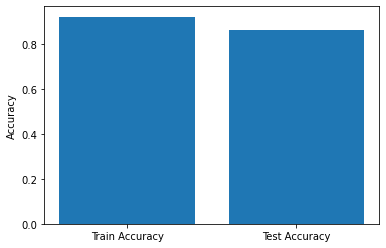

In [21]:
data_mnb = [train_acc_mnb, test_acc_mnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_mnb)), labels)
plt.ylabel('Accuracy')

plt.bar(range(len(data_mnb)), data_mnb)
plt.show()

## Confusion Matrix

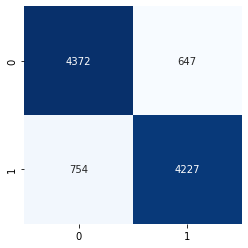

In [22]:
y_pred_mnb = mnb.predict(X_test)

matrix = confusion_matrix(y_test, y_pred_mnb)

s = sns.heatmap(matrix, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [23]:
print(classification_report(y_test, y_pred_mnb))

roc_score_mnb=roc_auc_score(y_test, y_pred_mnb)
print("Area Under curve = ",roc_score_mnb)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5019
           1       0.87      0.85      0.86      4981

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Area Under curve =  0.859857316339648


## F1, prescision and recall

In [24]:
print("F1: {:.2f}%".format(f1_score(y_test, y_pred_mnb, average="macro")*100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_mnb, average="macro")*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_mnb, average="macro")*100))

F1: 85.99%
Precision: 86.01%
Recall: 85.99%


## ROC

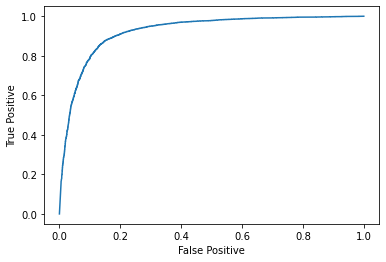

In [25]:
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,mnb.predict_proba(X_test)[:,1])

plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()